In [1]:
from CoolProp.CoolProp import PropsSI
import numpy as np
import matplotlib.pyplot as plt

#### For 101325 Pa at different concentrations
The model is valid for salt concentrations in the range of  1 < %w/w < 16% and temperatures between 10 < T <180°C

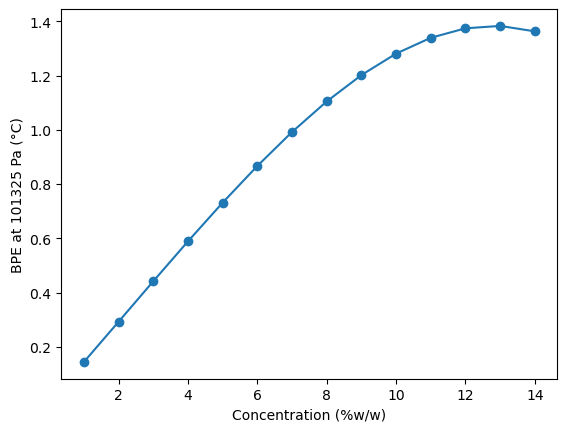

In [2]:

def BP_array(xf: np.ndarray, P1: float):
    """
    Calculates the boiling point elevation (BPE) and the corresponding temperature inside a system (T1) 
    based on a given concentration of a solute (salt) and the absolute pressure of the system
    Args:
        xf (np.ndarray): Array of concentrations of the flow (% w/w).
        P1 (float): Absolute pressure inside the effect (Pa)

    Returns:
        BPE (np.ndarray): Boiling point elevation (K). 
        T1 (np.ndarray): Temperature inside the effect (K).
    """
    # Boiling point of pure water at P1 (K)
    Tw = PropsSI('T', 'P', P1, 'Q', 0, 'Water')-273.15
    
    A = 8.325E-2 + (1.883E-4 * Tw) + (4.02E-6 * (Tw ** 2))
    B = -7.625e-4 + (9.02e-5 * Tw) - (5.2e-7 * (Tw ** 2))
    C = 1.522E-4 - (3E-6 * Tw) - (3E-8 * (Tw ** 2))
    
    # Calcular BPE y T1 para todo el array de xf
    BPE = A * xf + (B * (xf ** 2)) + (C * (xf ** 3))
    T1 = Tw + BPE
    
    return BPE, T1,Tw

#Using it at different xf
xf = np.arange(1,15, 1)
P1 = 101325  # Pressure in Pa
BPE,T1,Tw = BP_array(xf, P1)
plt.plot(xf, BPE, marker='o')
plt.xlabel('Concentration (%w/w)')
plt.ylabel('BPE at 101325 Pa (°C)')
plt.show()

plt.show()

#### Boiling point of water vs boiling point of the solution

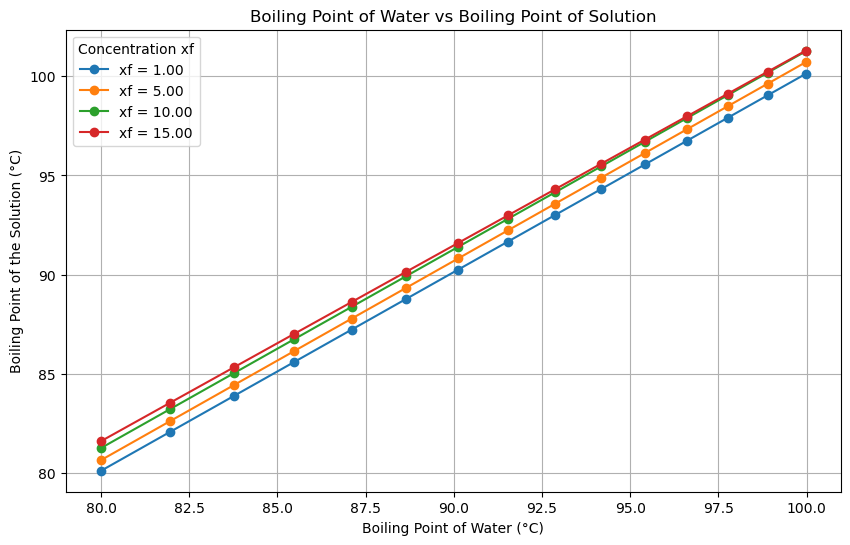

In [3]:

def BP_array(xf, P1):
    """
    Args:
        xf (float): Concentration of the flow (% w/w).
        P1 (float): Absolute pressure inside the effect (Pa)

    Returns:
        BPE (float): Boiling point elevation (K). 
        T1 (float): Temperature inside the effect (K).
        Tw (float): Boiling point of pure water (°C).
    """
    # Boiling point of pure water at P1 (K)
    Tw = PropsSI('T', 'P', P1, 'Q', 0, 'Water') - 273.15  # Convert to °C
    
    A = 8.325E-2 + (1.883E-4 * Tw) + (4.02E-6 * (Tw ** 2))
    B = -7.625e-4 + (9.02e-5 * Tw) - (5.2e-7 * (Tw ** 2))
    C = 1.522E-4 - (3E-6 * Tw) - (3E-8 * (Tw ** 2))
    
    # Calculate BPE and T1 for the given xf
    BPE = A * xf + (B * (xf ** 2)) + (C * (xf ** 3))
    T1 = Tw + BPE
    
    return BPE, T1, Tw

# Concentration values and pressures
xf_values = np.array([1, 5, 10, 15])  # Specific concentration values
P1 = np.linspace(47414.47402897125, 101325, 15)  # Pressure in Pa

# Initialize the plot
plt.figure(figsize=(10, 6))

# Calculate and plot for each xf
for xf in xf_values:
    BPE_list = []
    T1_list = []
    Tw_list = []
    
    for p in P1:
        BPE, T1, Tw = BP_array(xf, p)
        BPE_list.append(BPE)
        T1_list.append(T1)
        Tw_list.append(Tw)
    
    # Plot boiling point of water vs boiling point of the solution
    plt.plot(Tw_list, T1_list, marker='o', label=f'xf = {xf:.2f}')

# Configure the plot
plt.title('Boiling Point of Water vs Boiling Point of Solution')
plt.xlabel('Boiling Point of Water (°C)')
plt.ylabel('Boiling Point of the Solution (°C)')
plt.legend(title='Concentration xf')
plt.grid(True)
plt.show()
